In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import hyperopt
import sys
sys.path.append('../spock/')
try:
    plt.style.use('paper')
except:
    pass
%matplotlib inline

In [2]:
#load datapath for clean training data that is generated
datapath = '../../cleanData/csvs/resonant/'

dataset = pd.read_csv(datapath+'25-3-25-fillFac.csv')
#remove junk columns
dataset = dataset.drop(columns=['Unnamed: 0','Unnamed: 0.1'])

In [3]:
dataset.describe()

,EMcrossnear,EMfracstdnear,EPstdnear,MMRstrengthnear,2BRfillnear,EMcrossfar,EMfracstdfar,EPstdfar,MMRstrengthfar,2BRfillfar,3BRfill,MEGNO,MEGNOstd,Tsec,InitialStable,instability_time,shadow_instability_time
count,102497.000000,95951.000000,95951.000000,94867.000000,9.520900e+04,102497.000000,95951.000000,95951.000000,77274.000000,80909.000000,9.595100e+04,95951.000000,95951.000000,102497.000000,102497.000000,1.024970e+05,1.024970e+05
mean,0.144542,0.076233,0.004712,0.654740,-1.060116e+03,0.358875,0.036325,0.004954,0.254964,0.372125,3.408449e+03,27.440420,6.799008,19735.493103,0.936135,2.602292e+08,2.679298e+08
std,0.103741,0.100980,0.009005,1.716331,3.284007e+05,0.200712,0.040325,0.007801,1.140790,1.402522,1.024100e+06,76.894153,20.049037,22710.122815,0.244514,4.221284e+08,4.285158e+08
min,0.012845,0.000715,0.000002,0.000266,-1.013297e+08,0.020136,0.000105,0.000001,0.000089,0.000203,2.353566e-03,-314.442737,0.000001,608.030128,0.000000,1.000287e+04,0.000000e+00
25%,0.072808,0.024225,0.000362,0.059421,3.509326e-01,0.199495,0.009326,0.000596,0.012955,0.030262,1.327911e-01,1.998406,0.009299,5306.966101,1.000000,8.373884e+04,7.563998e+04
50%,0.117834,0.044674,0.001315,0.155531,1.146290e+00,0.315298,0.022727,0.001983,0.033351,0.098068,3.663249e-01,2.377402,0.199432,11471.208706,1.000000,1.390492e+06,1.410175e+06
75%,0.182629,0.087319,0.004939,0.564356,3.696746e+00,0.484311,0.048556,0.005883,0.105275,0.317599,9.527618e-01,16.863936,4.072095,25319.523778,1.000000,4.969742e+08,7.897363e+08
max,0.982453,7.790978,0.188420,64.907315,4.139040e+05,1.194679,0.600259,0.188758,60.421515,222.648794,3.170840e+08,2397.757540,668.779693,241280.324228,1.000000,1.000000e+09,1.000000e+09


In [4]:
import matplotlib as mpl

In [5]:
vmi = 0
vma = 4

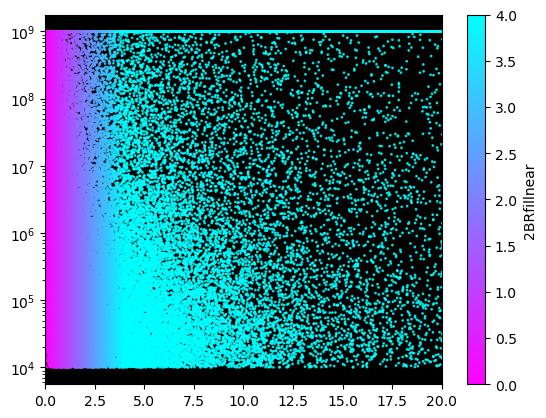

In [6]:
fig, ax = plt.subplots()
ax.set_facecolor((0, 0, 0))

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='cool_r'),
             ax=ax, orientation='vertical', label='2BRfillnear')
ax.scatter(dataset['2BRfillnear'], dataset['instability_time'], s=1, c=(dataset['2BRfillnear']),
            cmap='cool_r', vmin=vmi, vmax=vma, alpha =0.8)

ax.set_xlim((0,20))

ax.set_yscale('log')

In [65]:
data = dataset

KeyError: 'nu12'

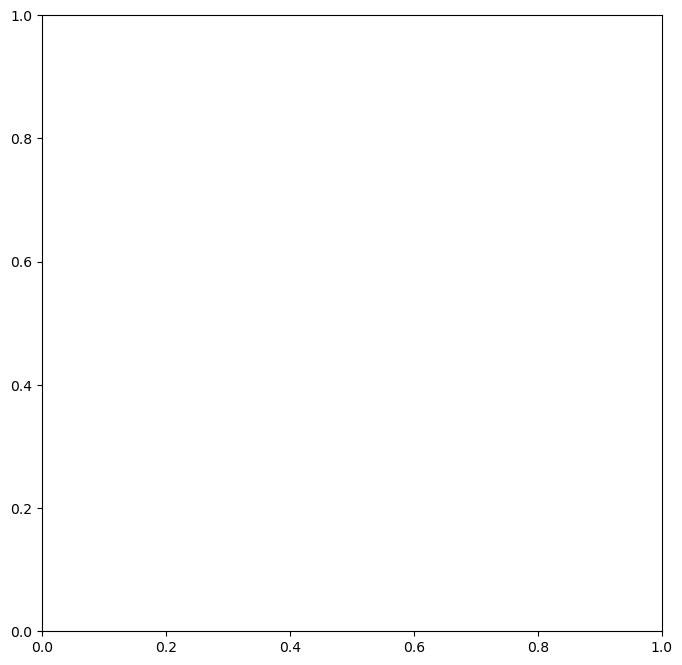

In [66]:
vmi = -1
vma = 1
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(1-data['nu12'], 1-data['nu23'], s=1, alpha = 0.5, c=np.log(data['threeBRfillfac']), cmap="cool", vmin=vmi,vmax=vma)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$(1-\nu_{12})$')
ax.set_ylabel(r'$(1-\nu_{23})$')

ax.set_aspect('equal')
ax.set_xlim(2e-2,0)
ax.set_ylim(2e-2,0)
ax.set_title(r'$1-\nu_{12}$ vs $1-\nu_{23}$')
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='cool'),
             ax=ax, orientation='vertical', label=r'$\log_{10}$threeBRfillFac')